In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Explanation:**
Imports all necessary Python libraries for data handling, numerical operations, and visualizations.  
Warnings are ignored to keep the notebook output clean.


In [2]:
historical = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")

**Explanation:**
Loads both CSV files into pandas DataFrames — one for historical trading data and another for market sentiment (Fear/Greed).


In [3]:
historical.shape

(211224, 16)

**Explanation:**
Checks the number of rows and columns in each dataset to understand their size.


In [4]:
fear_greed.shape

(2644, 4)

In [5]:
historical.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


**Explanation:**
Displays the first few rows from both datasets to get a quick look at the data and confirm successful loading.

In [6]:
fear_greed.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [7]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

**Explanation:**
Shows data types and non-null counts for each column. Helps identify missing values and types that may need conversion.

In [8]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
historical.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

**Explanation:**
Lists all column names in both datasets for easier reference during cleaning and merging.


In [10]:
fear_greed.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [11]:
historical.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


**Explanation:**
Counts missing (NaN) values in each column to check for incomplete data.


In [12]:
historical.dropna(inplace = True)

**Explanation:**
Removes any rows with missing values from both datasets to keep the data clean for analysis.


In [13]:
fear_greed.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [14]:
fear_greed.dropna(inplace = True)

In [15]:
fear_greed.duplicated().sum()

np.int64(0)

**Explanation:**
Checks for duplicate rows in the sentiment dataset to ensure data quality.


In [16]:
historical.columns = historical.columns.str.strip().str.lower().str.replace(" ", "_")
fear_greed.columns = fear_greed.columns.str.strip().str.lower().str.replace(" ", "_")

**Explanation:**
Cleans column names — removes spaces, converts to lowercase, and replaces spaces with underscores for consistency.


In [18]:
historical['date'] = pd.to_datetime(historical['timestamp_ist'], errors = 'coerce').dt.date
historical['time'] = pd.to_datetime(historical['timestamp_ist'], errors = 'coerce').dt.time
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors = 'coerce').dt.date

**Explanation:**
Creates separate `date` and `time` columns from the timestamp, converts them to proper datetime formats,  
and prepares both datasets for merging.


In [19]:
historical.drop(columns = 'timestamp_ist', inplace = True )

**Explanation:**
Drops the original timestamp column since it has been split into `date` and `time` columns.


In [20]:
data = pd.merge(historical, fear_greed, on='date', how='inner')

**Explanation:**
Merges the historical trading data with the Fear/Greed sentiment data on the shared `date` column using an inner join.


In [21]:
data

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,time,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,22:50:00,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,22:50:00,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,22:50:00,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,22:50:00,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,22:50:00,1707715800,70,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35859,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.1387,503.06,SELL,-443.143300,Open Short,0.0,0xeacbc003b3919c468166041aa5e84d01b6006967bcae...,60647462186,False,0.050306,4.190000e+14,1.740000e+12,2025-04-01,21:53:00,1743485400,34,Fear
35860,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,2.9050,10536.43,SELL,-443.282000,Open Short,0.0,0xe47714c2d752e1a171bf041aa5e84f01ef008aff277a...,60647462186,False,1.053643,6.720000e+14,1.740000e+12,2025-04-01,21:53:00,1743485400,34,Fear
35861,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.8280,3003.16,SELL,-446.187000,Open Short,0.0,0x9dad279d5f05919e1b60041aa5e84f01f4002a2dd2c2...,60647462186,False,0.300315,4.530000e+14,1.740000e+12,2025-04-01,21:53:00,1743485400,34,Fear
35862,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.7642,2771.75,SELL,-447.015000,Open Short,0.0,0xc363e90dbf42a7250427041aa5e84f01f6006e68416d...,60647462186,False,0.277175,3.550000e+14,1.740000e+12,2025-04-01,21:53:00,1743485400,34,Fear


**Explanation:**
Displays the merged dataset to verify that the join worked correctly and data from both sources combined successfully.


In [22]:
data.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'start_position', 'direction', 'closed_pnl', 'transaction_hash',
       'order_id', 'crossed', 'fee', 'trade_id', 'timestamp_x', 'date', 'time',
       'timestamp_y', 'value', 'classification'],
      dtype='object')

**Explanation:**
Lists all column names in the merged dataset for a quick reference after merging.


In [23]:
data.shape

(35864, 20)

**Explanation:**
Shows the shape of the merged dataset to confirm the number of rows and columns after merging.


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35864 entries, 0 to 35863
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           35864 non-null  object 
 1   coin              35864 non-null  object 
 2   execution_price   35864 non-null  float64
 3   size_tokens       35864 non-null  float64
 4   size_usd          35864 non-null  float64
 5   side              35864 non-null  object 
 6   start_position    35864 non-null  float64
 7   direction         35864 non-null  object 
 8   closed_pnl        35864 non-null  float64
 9   transaction_hash  35864 non-null  object 
 10  order_id          35864 non-null  int64  
 11  crossed           35864 non-null  bool   
 12  fee               35864 non-null  float64
 13  trade_id          35864 non-null  float64
 14  timestamp_x       35864 non-null  float64
 15  date              35864 non-null  object 
 16  time              35864 non-null  object

**Explanation:**
Displays dataset info, including column types and memory usage, to confirm correct data types after merging.


In [28]:
data.select_dtypes(include=[np.number])

,execution_price,size_tokens,size_usd,start_position,closed_pnl,order_id,fee,trade_id,timestamp_x,timestamp_y,value
0,7.9769,986.8700,7872.16,0.000000,0.0,52017706630,0.345404,8.950000e+14,1.730000e+12,1707715800,70
1,7.9800,16.0000,127.68,986.524596,0.0,52017706630,0.005600,4.430000e+14,1.730000e+12,1707715800,70
2,7.9855,144.0900,1150.63,1002.518996,0.0,52017706630,0.050431,6.600000e+14,1.730000e+12,1707715800,70
3,7.9874,142.9800,1142.04,1146.558564,0.0,52017706630,0.050043,1.080000e+15,1.730000e+12,1707715800,70
4,7.9894,8.7300,69.75,1289.488521,0.0,52017706630,0.003055,1.050000e+15,1.730000e+12,1707715800,70
...,...,...,...,...,...,...,...,...,...,...,...
35859,3627.0000,0.1387,503.06,-443.143300,0.0,60647462186,0.050306,4.190000e+14,1.740000e+12,1743485400,34
35860,3627.0000,2.9050,10536.43,-443.282000,0.0,60647462186,1.053643,6.720000e+14,1.740000e+12,1743485400,34
35861,3627.0000,0.8280,3003.16,-446.187000,0.0,60647462186,0.300315,4.530000e+14,1.740000e+12,1743485400,34
35862,3627.0000,0.7642,2771.75,-447.015000,0.0,60647462186,0.277175,3.550000e+14,1.740000e+12,1743485400,34


**Explanation:**
Selects and displays only numeric columns from the dataset for further analysis and plotting.


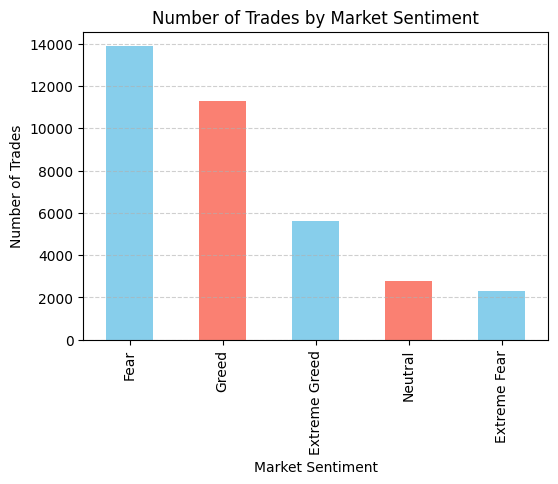

In [38]:
plt.figure(figsize=(6,4))
data['classification'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Explanation:**
Plots the number of trades that occurred during “Fear” and “Greed” sentiment periods.  
Gives a quick view of overall trading activity under different market moods.

# Fear has greater numbers of trade.

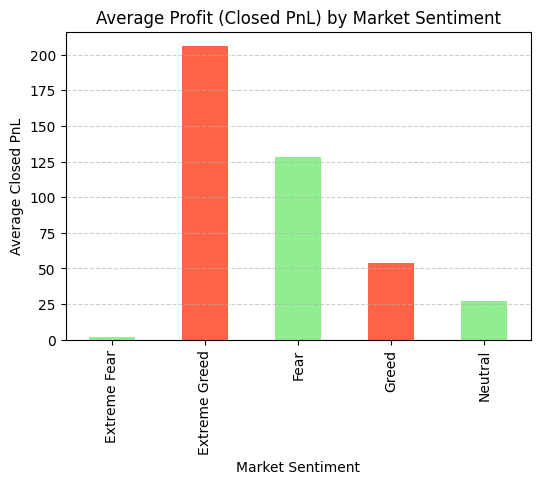

In [40]:
plt.figure(figsize=(6,4))
data.groupby('classification')['closed_pnl'].mean().plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Average Profit (Closed PnL) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Explanation:**
Shows the average closed profit (PnL) for trades under each sentiment type.  
Helps identify if traders earn more during Fear or Greed periods.

Extreme greed is greater than 200

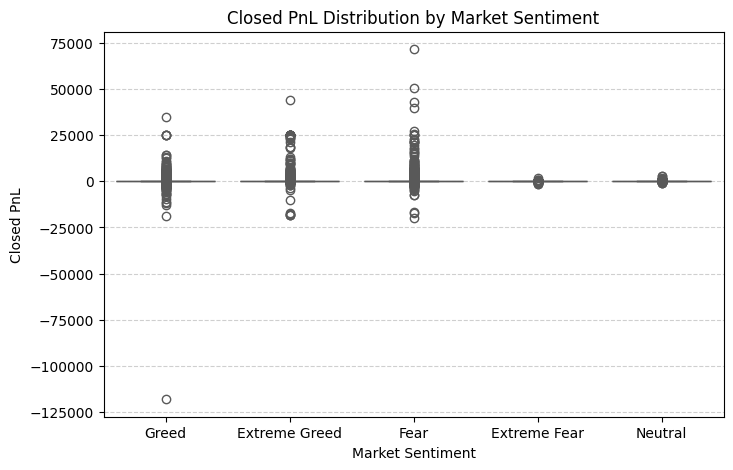

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='classification', y='closed_pnl', palette='Set2')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Explanation:**
Displays a boxplot showing the spread of profit (PnL) under both sentiments.  
Helps visualize performance variation and outliers.


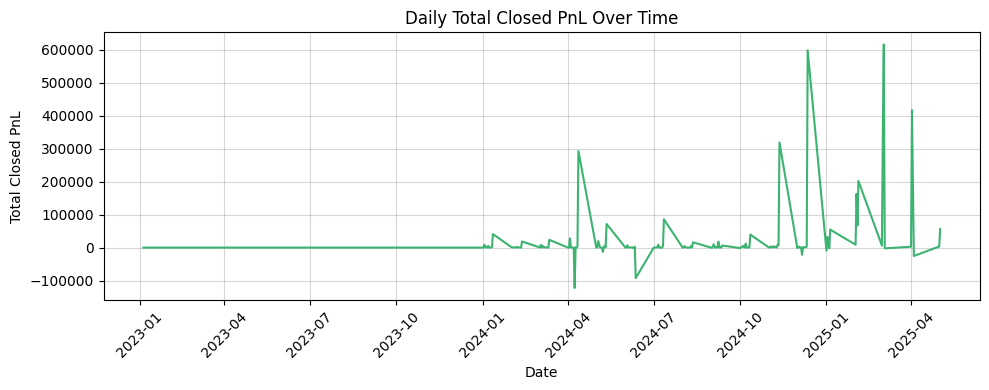

In [47]:
daily_pnl = data.groupby('date')['closed_pnl'].sum().reset_index()

plt.figure(figsize=(10,4))
plt.plot(daily_pnl['date'], daily_pnl['closed_pnl'], color='mediumseagreen')
plt.title('Daily Total Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


**Explanation:**
Aggregates total profit (PnL) by date and plots it over time to observe daily trading performance trends.


In [62]:
top5_coins = data['coin'].value_counts().nlargest(5).index
top5_data = data[data['coin'].isin(top5_coins)]

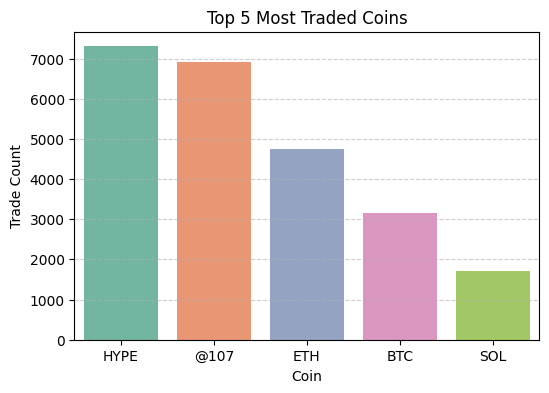

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(data=top5_data, x='coin', order=top5_coins, palette='Set2')
plt.title('Top 5 Most Traded Coins')
plt.xlabel('Coin')
plt.ylabel('Trade Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Explanation:**
Finds the five most traded coins and plots their trade counts.  
This shows which coins are traded most frequently by traders.

Hype has been traded most more than 7000 times.
2nd most traded coin is @107 more than 6000 times.
3rd most traded coin is ETH coin with more than 4000 times.
4th most traded coin is BTC with more than 3000 times.
5th most traded coin is SOL with more than 1000 times.